## Masked Properly?
### Group 1

#### Image Classification using Tensor Flow

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
import struct
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(f'TensorFlow version= {tf.__version__}')
print(f"CUDA available= {tf.test.gpu_device_name()}")

# # Check CUDA TensorFlow
tf.test.is_built_with_cuda()

TensorFlow version= 2.8.0
CUDA available= 


True

###### Gather a small subset of data

In [2]:
IMGSIZE = (128, 128)
X, Y = [],[]
max_test_size = 5000
count = 0
break_flag = False
# Read in images
path = './CMFD/CMFD'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[1,0]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

max_test_size = 5000
count = 0
break_flag = False
# Read in images
path = './IMFD/IMFD'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[0,1]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

read 500 images
read 1000 images
read 1500 images
read 2000 images
read 2500 images
read 3000 images
read 3500 images
read 4000 images
read 4500 images
read 5000 images
read 500 images
read 1000 images
read 1500 images
read 2000 images
read 2500 images
read 3000 images
read 3500 images
read 4000 images
read 4500 images
read 5000 images


### Add in the face vs mask image database with real masks

In [3]:
# Read in images
max_test_size = 1000
path = './RMFD/Masked_All/'
count = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[1,0]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

max_test_size = 1000
count = 0
break_flag = False
# Read in images
path = './RMFD/Improper_All/'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[0,1]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

read 500 images
read 1000 images
read 500 images
read 1000 images


In [4]:
IMGSIZE = (128, 128)
skip_amnt = -1
max_test_size = 500
# Read in images
path = './CMFD_google'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 500
count = 0
skip = 0
break_flag = False
# Read in images
path = './IMFD_google'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

In [5]:
print(f'Shape of the data: {X[0].shape}')
print(f'There are {len(X)} mask images')

Shape of the data: (128, 128, 3)
There are 12034 mask images


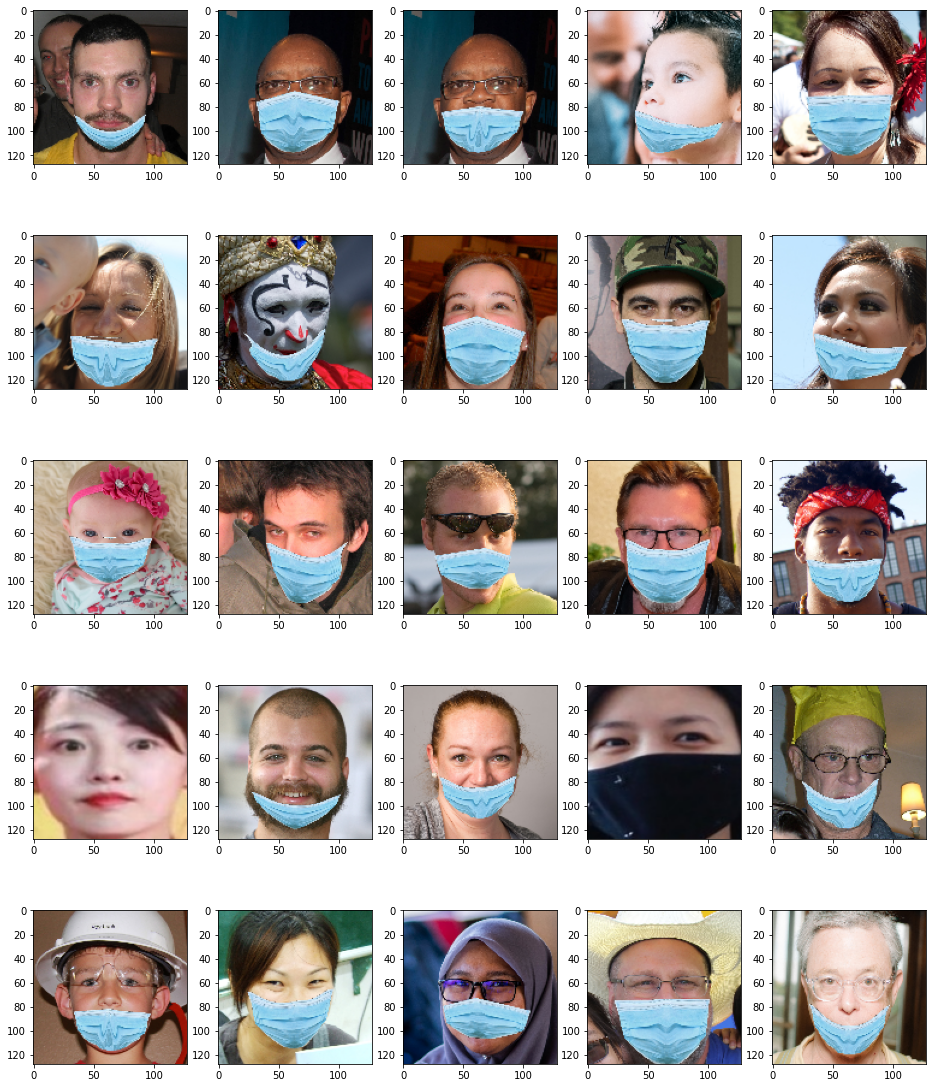

In [6]:
from random import randrange
# plot 25 random photos
random_indx = []
for i in range(25):
    random_indx.append(randrange(len(X)))

fig, ax = plt.subplots(5,5,figsize=(16,20))
count = 0
for r in range(5):
    for c in range(5):
        ax[r][c].imshow(X[random_indx[count]],cmap='gray')
        count = count + 1
plt.show()

## Preprocessing

1) Make sure the size of the images meet the input layer size requirements <br>
    a. Completed above, downsampled to 128 x 128 using opencv
2) Make sure images are rgb bgr like opencv reads them <br>
    Update On this, moved to gray scale due to memory issues <br>
3) Scale from 0 to 1 <br>

In [7]:
print('Train Images:')
X_scaled = np.array(X)
print(f'shape of numpy array: {X_scaled.shape}')
print('Before scaling:')
print(f'min value {np.min(X_scaled)}')
print(f'max value {np.max(X_scaled)}')
X_scaled = X_scaled/255
print('After scaling:')
print(f'min value {np.min(X_scaled)}')
print(f'max value {np.max(X_scaled)}')

Train Images:
shape of numpy array: (12034, 128, 128, 3)
Before scaling:
min value 0
max value 255
After scaling:
min value 0.0
max value 1.0


In [8]:
# convert the labels into arrays
# brute force
Y = np.array(Y)

# sanity check
print(f'label size: {Y.shape}')
print(f'mean value: {np.mean(Y, axis=0)}')

label size: (12034, 2)
mean value: [0.5 0.5]


## Create Test and Train Sets

1) The initial test train set will be split 80 20 <br>
2) Eventually the 10 fold cross validation will be used to assess success <br>

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.05, random_state=42)

print(f'test size: {Y_test.shape}')
print(f'train size: {Y_train.shape}')
print(f'mean label test: {np.mean(Y_test)}')
print(f'mean label train: {np.mean(Y_train)}')

test size: (602, 2)
train size: (11432, 2)
mean label test: 0.5
mean label train: 0.5


### Create CNN

In [10]:
# Our full CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=2, name='fc_2', activation='softmax'))



In [11]:
X_train.shape

(11432, 128, 128, 3)

In [12]:
# Set a seed for repeatibility
tf.random.set_seed(42)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3)) # None, 1024, 1024, 3 for rgb

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 4



In [13]:
%%time
history = cnn1.fit(X_train, Y_train,
        epochs=NUM_EPOCHS,
        shuffle=True)

Epoch 1/4
358/358 [==============================] - 172s 464ms/step - loss: 0.1254 - accuracy: 0.9602
Epoch 2/4
358/358 [==============================] - 160s 446ms/step - loss: 0.0404 - accuracy: 0.9869
Epoch 3/4
358/358 [==============================] - 165s 462ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 4/4
358/358 [==============================] - 166s 464ms/step - loss: 0.0182 - accuracy: 0.9937
CPU times: total: 2h 6min 3s
Wall time: 11min 20s


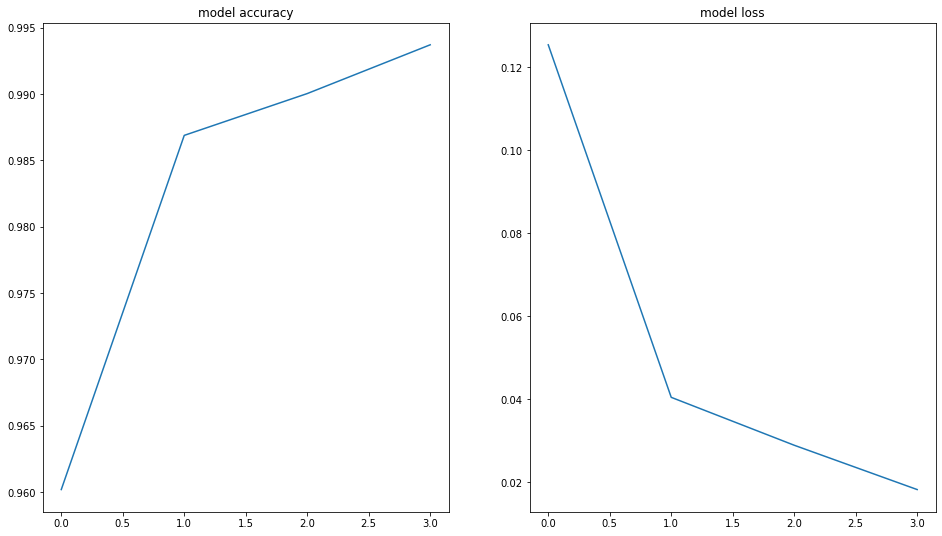

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('model accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_title('model loss')

plt.show()

In [15]:
# Training reclassification
y_pred = cnn1.predict(X_train)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_train, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 99.563


In [16]:
# Testing dataset
y_pred = cnn1.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 98.671


#### Real Data Test

Get data never seen before

In [17]:
IMGSIZE = (128, 128)
skip_amnt = 1500
max_test_size = 500
X, Y = [],[]
# Read in images
path = './RMFD/Masked_All/'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 500
count = 0
skip = 0
break_flag = False
# Read in images
path = './RMFD/Improper_All/'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

read 500 images


In [18]:
X_test_real = np.array(X)
X_test_real = X_test_real/255
Y_test_real = np.array(Y)
print(f'Real test set size: {X_test_real.shape}')

Real test set size: (510, 128, 128, 3)


In [19]:
# Testing dataset
y_pred = []
y_pred = cnn1.predict(X_test_real)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test_real, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 89.020


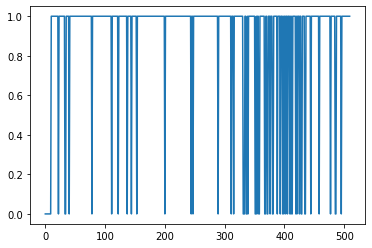

In [20]:
plt.plot(y_pred)

In [21]:
IMGSIZE = (128, 128)
skip_amnt = -1
max_test_size = 500
X, Y = [],[]
# Read in images
path = './CMFD_google'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 500
count = 0
skip = 0
break_flag = False
# Read in images
path = './IMFD_google'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

In [22]:
X_test_real = np.array(X)
X_test_real = X_test_real/255
Y_test_real = np.array(Y)
print(f'Real test set size: {X_test_real.shape}')

Real test set size: (34, 128, 128, 3)


In [23]:
# Testing dataset
y_pred = []
y_pred = cnn1.predict(X_test_real)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test_real, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 88.235


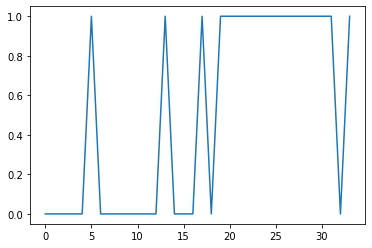

In [24]:
plt.plot(y_pred)